In [1]:
# Test for ECMWF/ERA-5 dataset
%matplotlib inline
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import pyaps3 as pa

print('------------------------------------------------')
print('You are using PyAPS from %s'%pa.__file__)
print('------------------------------------------------')

------------------------------------------------
You are using PyAPS from /Users/yunjunz/development/python/PyAPS/pyaps3/__init__.py
------------------------------------------------


In [2]:
print('Testing Download Methods')
print('Testing ECMWF Downloads')
pa.ECMWFdload(['20140526','20130426'],'12','./ECMWF', model='ERA5', snwe=(28,35,129,133))

print('------------------------------------------------')
print('Downloads OK')
print('------------------------------------------------')

Testing Download Methods
Testing ECMWF Downloads
INFO: You are using the latest ECMWF platform for downloading datasets: https://cds.climate.copernicus.eu/api/v2
------------------------------------------------
Downloads OK
------------------------------------------------


Testing ECMWF in Radar geometry with dem in DOUBLE format
With Lat Lon files (ISCE)
INFO: INCIDENCE ANGLE AS AN ARRAY
INFO: AREA COVERAGE IN SNWE: (33.85, 30.05, 129.05, 132.45)
PROGRESS: READING GRIB FILE
INFO: USING PRESSURE LEVELS OF ERA-INT OR ERA-5 DATA
INFO: IMAGE DIMENSIONS: 15 LATITUDES AND 13 LONGITUDES
PROGRESS: INTERPOLATING FROM PRESSURE TO HEIGHT LEVELS
PROGRESS: COMPUTING DELAY FUNCTIONS
INFO: INCIDENCE ANGLE AS AN ARRAY
INFO: AREA COVERAGE IN SNWE: (33.85, 30.05, 129.05, 132.45)
PROGRESS: READING GRIB FILE
INFO: USING PRESSURE LEVELS OF ERA-INT OR ERA-5 DATA
INFO: IMAGE DIMENSIONS: 15 LATITUDES AND 13 LONGITUDES
PROGRESS: INTERPOLATING FROM PRESSURE TO HEIGHT LEVELS
PROGRESS: COMPUTING DELAY FUNCTIONS
PROGRESS: FINE INTERPOLATION OF HEIGHT LEVELS
PROGRESS: CREATE THE BILINEAR INTERPOLATION FUNCTION
PROGRESS: MAPPING THE DELAY
[============================================================]      0s /      0s 
PROGRESS: FINE INTERPOLATION OF HEIGHT LEVELS
PROGRESS: CREATE TH

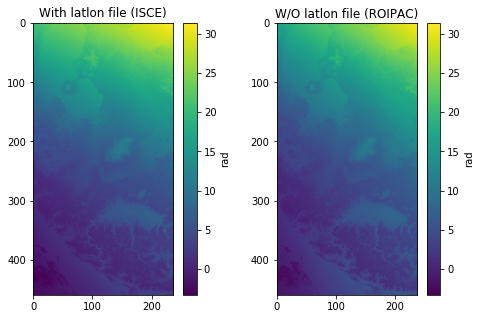

In [3]:
date1, date2 = '20130426', '20140526'
print('Testing ECMWF in Radar geometry with dem in DOUBLE format')

# read geometry files
dem = pa.utils.read_data('hgt.rdr')
inc = pa.utils.read_data('los.rdr', dname='inc')

print('With Lat Lon files (ISCE)')
lat = pa.utils.read_data('lat.rdr')
lon = pa.utils.read_data('lon.rdr')
aps1 = pa.PyAPS('ECMWF/ERA-5_{}_12.grb'.format(date1), dem=dem, inc=inc, lat=lat, lon=lon, grib='ERA5', verb=True)
aps2 = pa.PyAPS('ECMWF/ERA-5_{}_12.grb'.format(date2), dem=dem, inc=inc, lat=lat, lon=lon, grib='ERA5', verb=True)

phs1 = np.zeros((aps1.ny,aps1.nx))
phs2 = np.zeros((aps2.ny,aps2.nx))

aps1.getdelay(phs1, wvl=0.056)
aps2.getdelay(phs2, wvl=0.056)
LLphs = phs2-phs1

print('W/O Lat Lon files (ROIPAC)')
lat2, lon2 = pa.utils.get_lat_lon('hgt.rdr.rsc')
aps1 = pa.PyAPS('ECMWF/ERA-5_{}_12.grb'.format(date1), dem=dem, inc=inc, lat=lat2, lon=lon2, grib='ERA5', verb=True)
aps2 = pa.PyAPS('ECMWF/ERA-5_{}_12.grb'.format(date2), dem=dem, inc=inc, lat=lat2, lon=lon2, grib='ERA5', verb=True)

phs1 = np.zeros((aps1.ny,aps1.nx))
phs2 = np.zeros((aps2.ny,aps2.nx))

aps1.getdelay(phs1, wvl=0.056)
aps2.getdelay(phs2, wvl=0.056)
phs = phs2-phs1

# plot
disp_min = min([np.nanmin(LLphs), np.nanmin(phs)])
disp_max = min([np.nanmax(LLphs), np.nanmax(phs)])
fig, [ax1,ax2] = plt.subplots(num='ECMWF/ERA-5 for {}_{}'.format(date1, date2), nrows=1, ncols=2, figsize=[8, 5])
im1 = ax1.imshow(LLphs, vmin=disp_min, vmax=disp_max)
im2 = ax2.imshow(phs, vmin=disp_min, vmax=disp_max)
ax1.set_title('With latlon file (ISCE)')
ax2.set_title('W/O latlon file (ROIPAC)')
cbar1 = fig.colorbar(im1, ax=ax1)
cbar2 = fig.colorbar(im2, ax=ax2)
cbar1.set_label('rad')
cbar2.set_label('rad')

print('------------------------------------------------')
print('ECMWF OK')
print('------------------------------------------------')
plt.show()

Testing ECMWF/ERA-5 with PySAR geometry file
INFO: INCIDENCE ANGLE AS AN ARRAY
INFO: AREA COVERAGE IN SNWE: (33.86, 30.05, 129.04, 132.46)
PROGRESS: READING GRIB FILE
INFO: USING PRESSURE LEVELS OF ERA-INT OR ERA-5 DATA
INFO: IMAGE DIMENSIONS: 15 LATITUDES AND 13 LONGITUDES
PROGRESS: INTERPOLATING FROM PRESSURE TO HEIGHT LEVELS
PROGRESS: COMPUTING DELAY FUNCTIONS
INFO: INCIDENCE ANGLE AS AN ARRAY
INFO: AREA COVERAGE IN SNWE: (33.86, 30.05, 129.04, 132.46)
PROGRESS: READING GRIB FILE
INFO: USING PRESSURE LEVELS OF ERA-INT OR ERA-5 DATA
INFO: IMAGE DIMENSIONS: 15 LATITUDES AND 13 LONGITUDES
PROGRESS: INTERPOLATING FROM PRESSURE TO HEIGHT LEVELS
PROGRESS: COMPUTING DELAY FUNCTIONS
PROGRESS: FINE INTERPOLATION OF HEIGHT LEVELS
PROGRESS: CREATE THE BILINEAR INTERPOLATION FUNCTION
PROGRESS: MAPPING THE DELAY
[============================================================]      5s /      0s 
PROGRESS: FINE INTERPOLATION OF HEIGHT LEVELS
PROGRESS: CREATE THE BILINEAR INTERPOLATION FUNCTION
PROGR

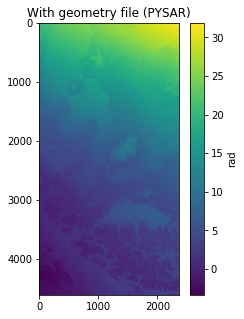

In [4]:
from pysar.utils import readfile
date1, date2 = '20130426', '20140526'
print('Testing ECMWF/ERA-5 with PySAR geometry file')

# read geometry files
dem_file = os.path.expanduser('~/insarlab/Kirishima/AlosAT424F620_630/PYSAR/INPUTS/geometryRadar.h5')
dem = readfile.read(dem_file, datasetName='height')[0]
inc = readfile.read(dem_file, datasetName='incidenceAngle')[0]
lat = readfile.read(dem_file, datasetName='latitude')[0]
lon = readfile.read(dem_file, datasetName='longitude')[0]

aps1 = pa.PyAPS('ECMWF/ERA-5_{}_12.grb'.format(date1), dem=dem, inc=inc, lat=lat, lon=lon, grib='ERA5', verb=True)
aps2 = pa.PyAPS('ECMWF/ERA-5_{}_12.grb'.format(date2), dem=dem, inc=inc, lat=lat, lon=lon, grib='ERA5', verb=True)

phs1 = np.zeros((aps1.ny,aps1.nx))
phs2 = np.zeros((aps2.ny,aps2.nx))

aps1.getdelay(phs1, wvl=0.056)
aps2.getdelay(phs2, wvl=0.056)
LLphs = phs2-phs1

# plot
fig, ax = plt.subplots(num='ECMWF/ERA-5 for {}_{}'.format(date1, date2), nrows=1, ncols=1, figsize=[4, 5])
im = ax.imshow(LLphs)
ax.set_title('With geometry file (PYSAR)')
cbar = fig.colorbar(im, ax=ax)
cbar.set_label('rad')

print('------------------------------------------------')
print('ECMWF OK')
print('------------------------------------------------')
plt.show()